# matplotlib-label-lines example

From https://github.com/cphyc/matplotlib-label-lines.

In [17]:
!pip install matplotlib-label-lines

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import loglaplace, chi2

from labellines import labelLine, labelLines

In [19]:
X = np.linspace(0, 1, 500)
A = [1, 2, 5, 10, 20]
funcs = [np.arctan, np.sin, loglaplace(4).pdf, chi2(5).pdf]

[Text(0.17, 0.168390066359902, '1'),
 Text(0.335, 0.5903060408009769, '2'),
 Text(0.5, 1.190288755848347, '5'),
 Text(0.665, 1.4215385518686854, '10'),
 Text(0.8300000000000001, 1.5106280265233845, '20')]

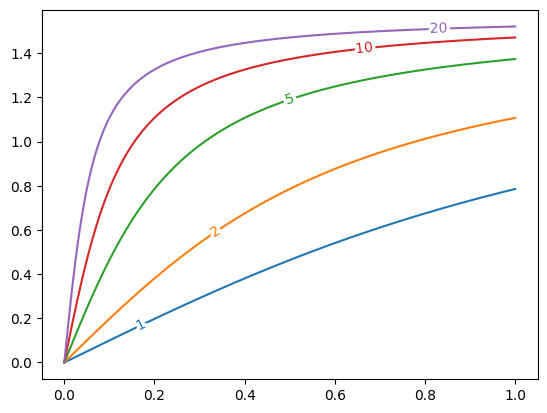

In [20]:
for a in A:
    plt.plot(X, np.arctan(a * X), label=str(a))

labelLines(plt.gca().get_lines(), zorder=2.5)

[Text(0.17, 0.1691823012553142, '1'),
 Text(0.335, 0.6209852990638819, '2'),
 Text(0.5, 0.598464633204248, '5'),
 Text(0.665, 0.35863404718913355, '10'),
 Text(0.8300000000000001, -0.7782632450929943, '20')]

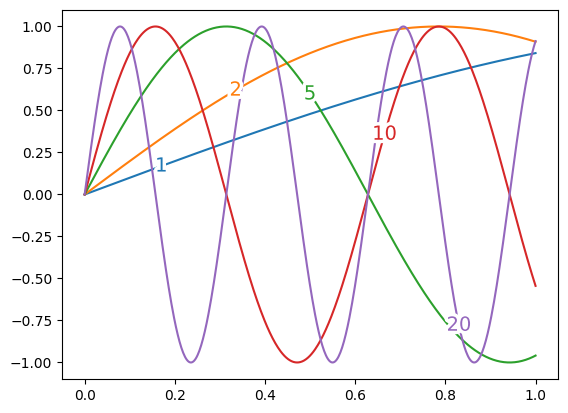

In [21]:
for a in A:
    plt.plot(X, np.sin(a * X), label=str(a))

labelLines(plt.gca().get_lines(), align=False, fontsize=14)

[Text(0.8, 1.0240030858702156, '1'),
 Text(0.55, 1.2419038028263016, '2'),
 Text(0.22, 1.2421110872188392, '5'),
 Text(0.104, 1.644738848565175, '10'),
 Text(0.045, 1.4601539736756006, '20')]

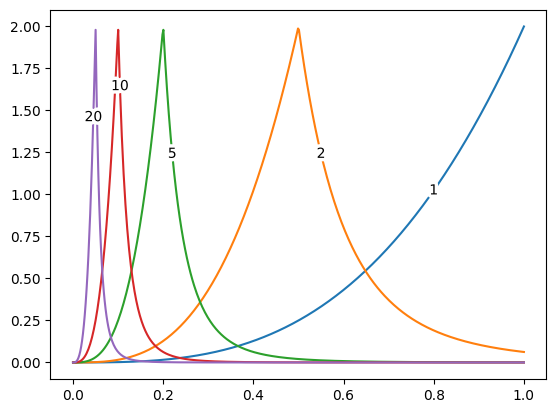

In [22]:
for a in A:
    plt.plot(X, loglaplace(4).pdf(a * X), label=str(a))

xvals = [0.8, 0.55, 0.22, 0.104, 0.045]
labelLines(plt.gca().get_lines(), align=False, xvals=xvals, color="k")

[Text(0.85, 0.07813056520402016, '1'),
 Text(0.85, 0.13598293382581747, '2'),
 Text(0.85, 0.14915418173059214, '5'),
 Text(0.85, 0.05700743823842916, '10')]

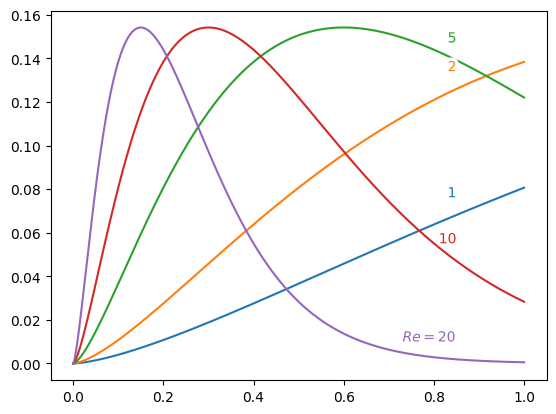

In [23]:
for a in A:
    plt.plot(X, chi2(5).pdf(a * X), label=str(a))

lines = plt.gca().get_lines()
l1 = lines[-1]
labelLine(
    l1,
    0.85,
    label=rf"$Re=${l1.get_label()}",
    align=False,
    yoffset=0.01,
    ha="right",
    backgroundcolor="none",
)
labelLines(
    lines[:-1],
    xvals=0.85,
    yoffsets=0.01,
    align=False,
    ha="right",
    backgroundcolor="none",
)

[Text(0.0057620436925245365, 0.028801963400701507, '1'),
 Text(0.016060650712809803, 0.15924568134671171, '2'),
 Text(0.04476614810358451, 0.8414428330966081, '5'),
 Text(0.12477751069162386, 1.411855323679676, '10'),
 Text(0.34779465810576704, 1.5420514121540916, '20')]

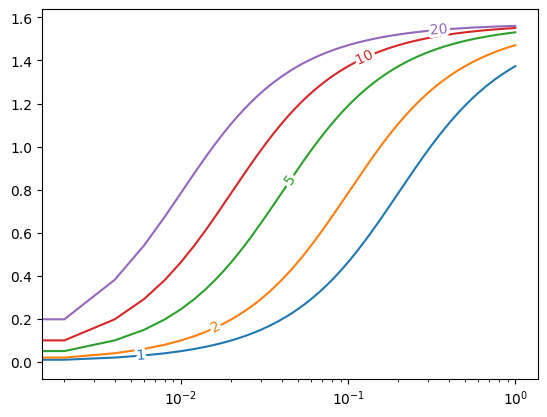

In [24]:
for a in A:
    plt.semilogx(X, np.arctan(5 * a * X), label=str(a))

labelLines(plt.gca().get_lines(), zorder=2.5)

[Text(0.14677992676220694, 0.006948961943773443, '1'),
 Text(0.21544346900318834, 0.03032275101145642, '2'),
 Text(0.31622776601683794, 0.11992299878147598, '5'),
 Text(0.46415888336127786, 0.13058094540506895, '10'),
 Text(0.6812920690579611, 0.007353966688069529, '20')]

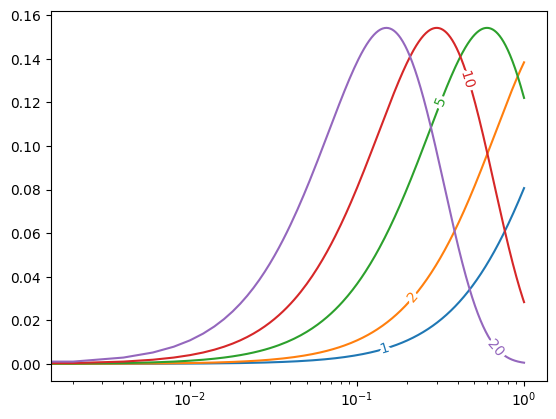

In [25]:
for a in A:
    plt.semilogx(X, chi2(5).pdf(a * X), label=str(a))

labelLines(plt.gca().get_lines(), xvals=(0.1, 1), zorder=2.5)

<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_29911/1570717394.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.title("$\mathtt{drop\_label=False}$")
/tmp/ipykernel_29911/1570717394.py:18: SyntaxWarning: invalid escape sequence '\m'
  plt.title("$\mathtt{drop\_label=True}$")
/tmp/ipykernel_29911/1570717394.py:6: RuntimeWarning: divide by zero encountered in power
  plt.plot(X, X ** (-2) / i, label=f"$x^2/{i}$")


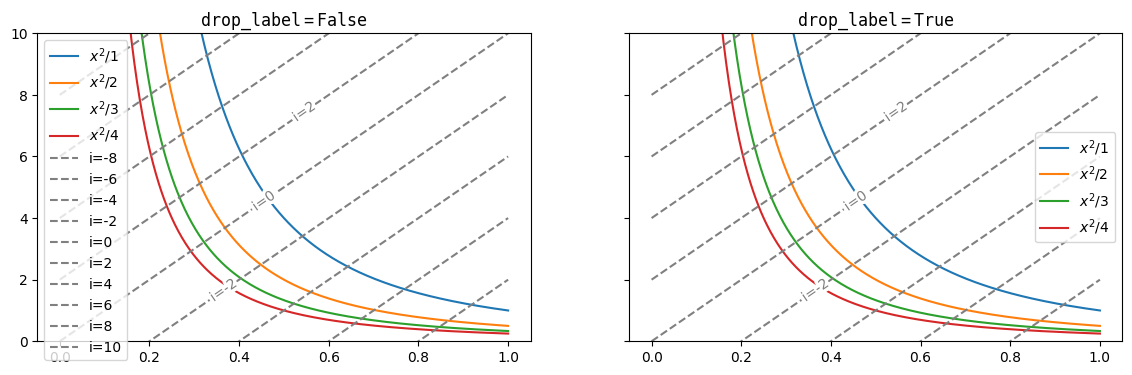

In [26]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14, 4))

for j, ax in enumerate(axes):
    fig.sca(ax)
    for i in range(1, 5):
        plt.plot(X, X ** (-2) / i, label=f"$x^2/{i}$")
    plt.ylim(0, 10)

    lines = []
    for i in range(-8, 12, 2):
        lines.extend(plt.plot(X, 10 * X + i, "--", color="gray", label=f"i={i}"))

    if j == 0:
        labelLines(lines, zorder=2.5)
        plt.title("$\mathtt{drop\_label=False}$")
    else:
        labelLines(lines, zorder=2.5, drop_label=True)
        plt.title("$\mathtt{drop\_label=True}$")
    plt.legend()